# Major Leagues

### __1. INDUSTRY__ 

__Sports__ industry is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Github](https://github.com) in [this link](https://github.com/fivethirtyeight/data/tree/master/soccer-spi).

__DESCRIPTION__: The datasets contains data related to soccer league, team, spi, probability, projected score and scores. The following attributes from the datasets will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| team | object   |
| spi   | float64 |
|prob| float64|
|proj_score| float64|
|score| float64||

### __3. IDEAS__

__3.1.__ To predict a team's score irrespective of the opposite team.

__3.2.__ To predict a team's score when it is playing with certain team.

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv files of dataset__

In [2]:
soccer_data=pd.read_csv("/Users/madhumithrasubramaniankarthikesh/Downloads/spi_matches_latest.csv")
soccer_data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
2,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10


### __5. DATA PREPARATION__

__5.1 DATA CLEANING AND FEATURE ENGINEERING__

__Shape of all the data__

In [3]:
print("Shape of soccer: "+str(soccer_data.shape))

Shape of soccer: (10930, 23)


__Make into a new dataset with scores for all team in each matches__

In [4]:
team1_data=pd.DataFrame(soccer_data[['season','date','league_id','team1','spi1','prob1','proj_score1','importance1','score1','xg1','nsxg1','adj_score1']])
team1_data.rename(columns={"team1": "team", "spi1": "spi","prob1": "prob", "proj_score1": "proj_score","score1": "score", "xg1": "xg"}, inplace=True)
team1_data.rename(columns={"importance1": "importance","nsxg1": "nsxg", "adj_score1": "adj_score"}, inplace=True)
team1_data.head()

,season,date,league_id,team,spi,prob,proj_score,importance,score,xg,nsxg,adj_score
0,2019,2019-03-01,1979,Shandong Luneng,48.22,0.5755,1.75,45.9,1.0,1.39,2.05,1.05
1,2019,2019-03-01,1979,Guangzhou Evergrande,65.59,0.7832,2.58,77.1,3.0,0.49,1.05,3.15
2,2019,2019-03-01,1979,Shanghai Greenland,39.81,0.2387,1.22,25.6,0.0,0.57,0.80,0.00
3,2019,2019-03-01,1979,Wuhan Zall,32.25,0.2276,1.10,35.8,0.0,1.12,1.51,0.00
4,2019,2019-03-01,1979,Chongqing Lifan,38.24,0.4403,1.57,26.2,2.0,2.77,1.05,2.10


In [5]:
team2_data=pd.DataFrame(soccer_data[['season','date','league_id','team2','spi2','prob2','proj_score2','importance2','score2','xg2','nsxg2','adj_score2']])
team2_data.rename(columns={"team2": "team", "spi2": "spi","prob2": "prob", "proj_score2": "proj_score","score2": "score", "xg2": "xg","importance2": "importance", "nsxg2": "nsxg", "adj_score2": "adj_score"}, inplace=True)
team2_data.head()

,season,date,league_id,team,spi,prob,proj_score,importance,score,xg,nsxg,adj_score
0,2019,2019-03-01,1979,Guizhou Renhe,37.83,0.1740,0.84,22.1,0.0,0.26,0.54,0.00
1,2019,2019-03-01,1979,Tianjin Quanujian,39.99,0.0673,0.62,28.8,0.0,0.45,0.75,0.00
2,2019,2019-03-01,1979,Shanghai SIPG,60.08,0.5203,1.89,63.4,4.0,2.76,1.50,3.26
3,2019,2019-03-01,1979,Beijing Guoan,54.82,0.5226,1.79,58.9,1.0,0.97,0.94,1.05
4,2019,2019-03-01,1979,Guangzhou RF,40.45,0.2932,1.24,21.3,2.0,3.17,2.08,2.10


In [6]:
soccer_data = pd.concat([team1_data, team2_data], axis=0)
soccer_data.head()

,season,date,league_id,team,spi,prob,proj_score,importance,score,xg,nsxg,adj_score
0,2019,2019-03-01,1979,Shandong Luneng,48.22,0.5755,1.75,45.9,1.0,1.39,2.05,1.05
1,2019,2019-03-01,1979,Guangzhou Evergrande,65.59,0.7832,2.58,77.1,3.0,0.49,1.05,3.15
2,2019,2019-03-01,1979,Shanghai Greenland,39.81,0.2387,1.22,25.6,0.0,0.57,0.80,0.00
3,2019,2019-03-01,1979,Wuhan Zall,32.25,0.2276,1.10,35.8,0.0,1.12,1.51,0.00
4,2019,2019-03-01,1979,Chongqing Lifan,38.24,0.4403,1.57,26.2,2.0,2.77,1.05,2.10


In [7]:
soccer_data.shape

(21860, 12)

__Drop the NaN rows__

In [8]:
del soccer_data["xg"]
del soccer_data["nsxg"]
del soccer_data["adj_score"]
del soccer_data["season"]
del soccer_data["date"]
del soccer_data["league_id"]
del soccer_data["importance"]
soccer_data=soccer_data.dropna()
soccer_data.head()

,team,spi,prob,proj_score,score
0,Shandong Luneng,48.22,0.5755,1.75,1.0
1,Guangzhou Evergrande,65.59,0.7832,2.58,3.0
2,Shanghai Greenland,39.81,0.2387,1.22,0.0
3,Wuhan Zall,32.25,0.2276,1.10,0.0
4,Chongqing Lifan,38.24,0.4403,1.57,2.0


__Shape of all the data__

In [9]:
print("Soccer: "+str(soccer_data.shape))

Soccer: (7186, 5)


__Attributes and datatypes of the dataset__

In [10]:
for column in soccer_data.columns:
    print(column, " is ", soccer_data[column].dtype.name)

team  is  object
spi  is  float64
prob  is  float64
proj_score  is  float64
score  is  float64


__5.2 VISUALIZATION__

__Barplot for score__

Text(0.5, 0, 'Score')

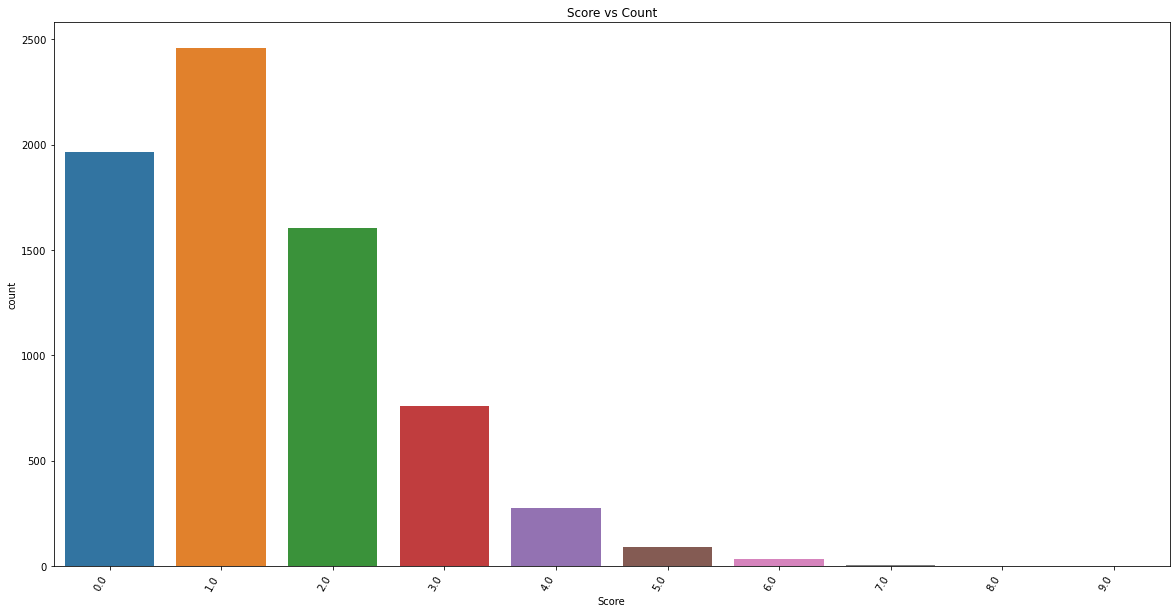

In [11]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=soccer_data['score'], data=soccer_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Score vs Count');
g.set_xlabel('Score')

The number of times teams have got a score of 1 is greater than any other score.

__Countplot for projected score__

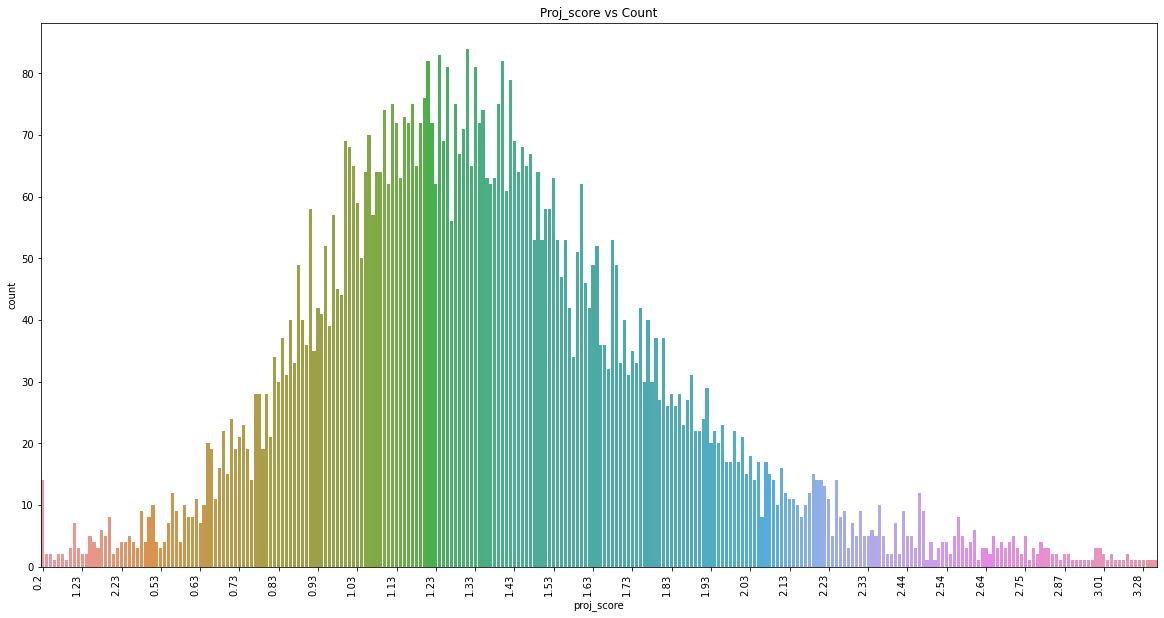

In [27]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=soccer_data['proj_score'], data=soccer_data)
g.set_xticklabels(g.get_xticklabels()[::10], rotation=90, ha="right", fontsize=10);
new_ticks=g.get_xticklabels()
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
g.set_title('Proj_score vs Count');


The projected score also lies within 1 and 1.5 for the same data which is in agreement with the actual score of 1.

__5.3 Regression__

__Train, test and validation dataset for predicting scores of the teams__

In [13]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
cols=['team','spi','prob','proj_score']

#replace 0 as 5
col=soccer_data['score'].replace(0, 5)

# define one hot encoding for the categorical independent variables
encoder = OneHotEncoder(sparse=False)
# transform data
x = encoder.fit_transform(soccer_data[cols])

# define label encoding for the dependent variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(col)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test = 10% of the initial data set
# validation = 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

__5.3.1 Linear Regression__

__Training and Testing: Linear regression for predicting the scores of the team__

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
clf = LinearRegression().fit(x_train, y_train)
y_pred=clf.predict(x_test)
# The coefficients
print("Test Coefficients:",clf.coef_)
# The mean squared error
print("Test Mean squared error: ",mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Test Coefficient of determination: ",r2_score(y_test, y_pred))
# print the coefficients
list(zip(cols, clf.coef_))

Test Coefficients: [ 0.7111271   0.06660344 -0.45442077 ... -0.35614945  0.
  1.23768951]
Test Mean squared error:  6.87927735547539
Test Coefficient of determination:  -1.6014428823427225


[('team', 0.7111270964839373),
 ('spi', 0.06660343651810852),
 ('prob', -0.4544207709540689),
 ('proj_score', 0.21738030414425213)]

__Validation: Linear regression for predicting the scores of the team__

In [15]:
y_pred = clf.predict(x_val)

# The coefficients
print("Coefficients: "+ str(clf.coef_))
# The mean squared error
print("Mean squared error: "+ str(mean_squared_error(y_val, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: "+str(r2_score(y_val, y_pred)))

Coefficients: [ 0.7111271   0.06660344 -0.45442077 ... -0.35614945  0.
  1.23768951]
Mean squared error: 6.836565968761102
Coefficient of determination: -1.3542407317350187


__5.3.2 Random Forest__

__Training: Random forest classifier for predicting the scores of the team__

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10)
# Train the model on training data
rf.fit(x_train, y_train);

__Testing: Random forest classifier for predicting the scores of the team__

In [20]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

from scipy.stats import pearsonr
# find the correlation between real answer and prediction
correlation = pearsonr(y_pred, y_test)
print('Correlation: ',correlation)

from sklearn.metrics import mean_absolute_error
print('Validation Accuracy: ',rf.score(x_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
import warnings
warnings.filterwarnings('ignore')
accuracy= (~np.isnan(100*((mean_absolute_error(y_test, y_pred))/y_test))) 
accuracy=round (100 - np.mean(accuracy),2)
print('Accuracy for Random Forest:',accuracy) 


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: "+str(r2_score(y_test, y_pred)))

Correlation:  (0.09999825271236096, 0.007287033022755875)
Validation Accuracy:  -0.2796886813707702
Mean Absolute Error: 1.4315716272600834
Mean Squared Error: 3.3840194714881777
Root Mean Squared Error: 1.8395704584190782
Accuracy for Random Forest: 99.0
Coefficient of determination: -0.2796886813707702


__Validation: Random forest classifier for predicting the scores of the team__

In [28]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_val)

print('Validation Accuracy: ',rf.score(x_val, y_val))
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_pred)))

accuracy= (~np.isnan(100*((mean_absolute_error(y_val, y_pred))/y_val))) 
accuracy=round (100 - np.mean(accuracy),2)
print('Accuracy for Random Forest:',accuracy) 

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: "+str(r2_score(y_val, y_pred)))

Validation Accuracy:  -0.4403113796627016
Mean Absolute Error: 1.6479833101529904
Mean Squared Error: 4.182573018080667
Root Mean Squared Error: 2.0451339853615136
Accuracy for Random Forest: 99.0
Coefficient of determination: -0.4403113796627016


The random forest regression works better when compared to the linear regression. This can be seen from the accuracy of random forest. The mean squared error value is higher for linear regression when compared to the random forest.